In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [32]:
data =pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [34]:
data.shape

(8807, 12)

In [35]:
print(data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [36]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [37]:
data['director'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)

C:\Users\Rao Baber Ali\AppData\Local\Temp\ipykernel_18776\1206987547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna('Unknown', inplace=True)
C:\Users\Rao Baber Ali\AppData\Local\Temp\ipykernel_18776\1206987547.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [38]:
data.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [39]:
# Check for duplicates in your dataset
data.duplicated().sum()

np.int64(0)

In [40]:
# There is no duplicate 

In [41]:
# Make a copy of dataset
data = data.copy()
data.shape

(8807, 12)

In [42]:
# Drop nulll values
data =data.dropna()
data.shape

(8790, 12)

In [43]:
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [44]:
data["date_added"] = pd.to_datetime(data['date_added'], errors='coerce')


In [45]:
# Extract day, month, and year
data['day_added'] = data['date_added'].dt.day.fillna(0).astype(int)
data['month_added'] = data['date_added'].dt.month.fillna(0).astype(int)
data['year_added'] = data['date_added'].dt.year.fillna(0).astype(int)


In [46]:
data = data.dropna(subset=['date_added'])


In [47]:
# Convert 'date_added' to datetime
data["date_added"] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract day, month, and year
data['day_added'] = data['date_added'].dt.day.astype(int)
data['month_added'] = data['date_added'].dt.month.astype(int)
data['year_added'] = data['date_added'].dt.year.astype(int)



In [48]:
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24,9,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,9,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,9,2021


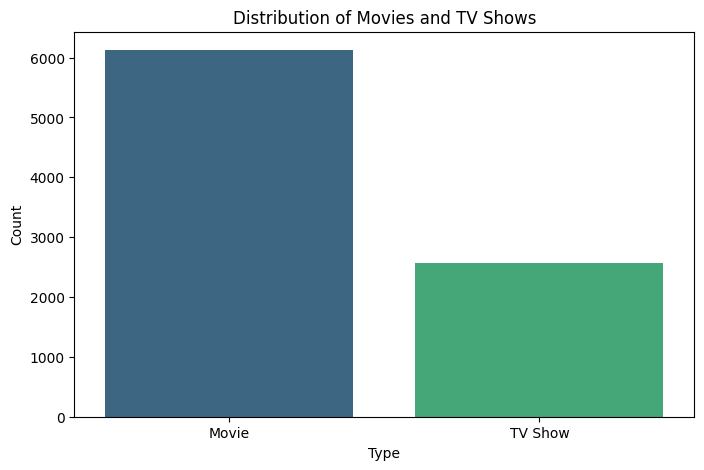

In [49]:
# Data visuallization
# Assuming 'type' column contains 'Movie' and 'TV Show'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='type', hue='type', dodge=False, legend=False, palette='viridis')
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

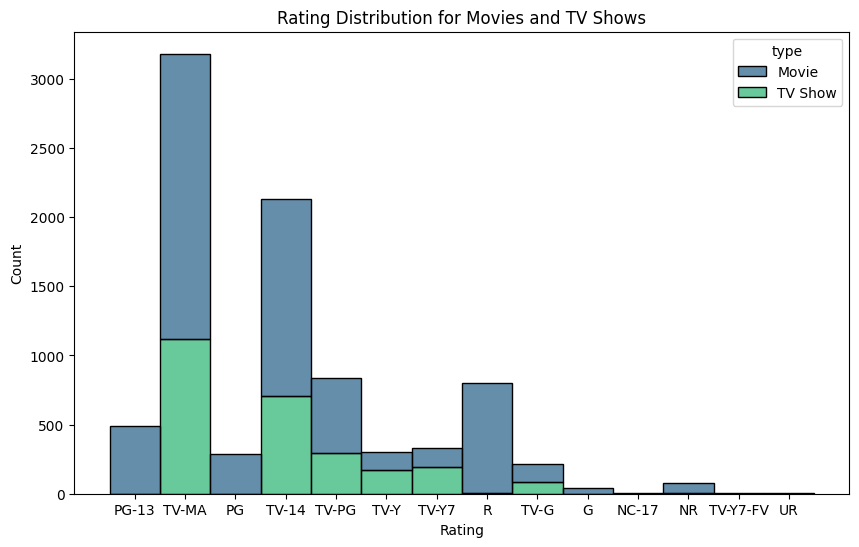

In [50]:
# Rating of shows and movies
# Calculate the average rating for each type
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='rating', hue='type', multiple='stack', palette='viridis', bins=10)
plt.title('Rating Distribution for Movies and TV Shows')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


The histogram's color-coded stacks allow you to see which type (movies or TV shows) is more common in each rating range. By observing the height of each color segment, you can determine which category has higher counts in each rating bin.

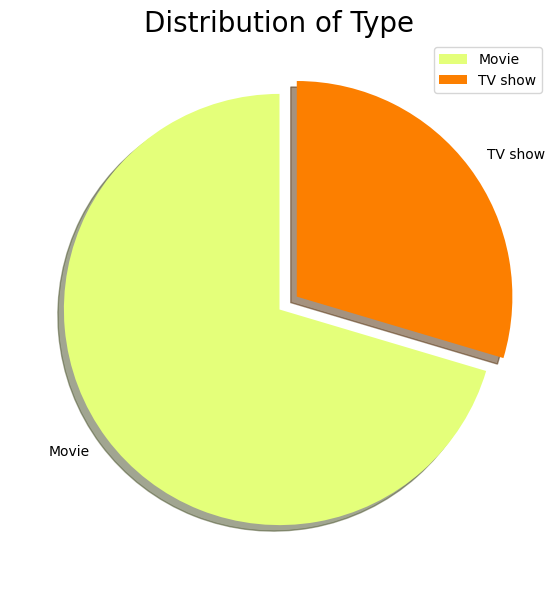

In [51]:
# Assuming 'type' is the column that contains 'Movie' and 'TV show' in your dataset
labels = ['Movie', 'TV show']
size = data['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]

# Adjust the figure size to a smaller size
plt.rcParams['figure.figsize'] = (7, 7)  # Change this to a smaller size
plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Distribution of Type', fontsize=20)  # You can also reduce the title fontsize if needed
plt.legend()
plt.show()


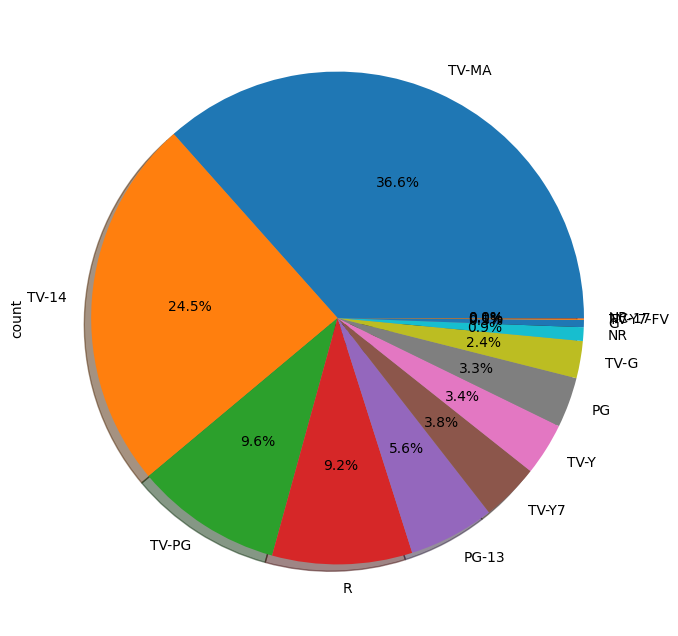

In [52]:
data['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()


In [64]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
month_added     0
year_added      0
dtype: int64

In [53]:
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24,9,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,9,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,9,2021


In [58]:
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Unknown')

# To find Top 10 Directors 
top_directors = data['director'].value_counts().head(10)
print("Top 10 Directors on Netflix:\n", top_directors)


all_actors = data['cast'].str.split(',').sum()

# To remove Whitespace 
all_actors = pd.Series([actor.strip() for actor in all_actors])


Top 10 Directors on Netflix:
 director
Unknown                   2538
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Martin Scorsese             12
Jay Chapman                 12
Name: count, dtype: int64


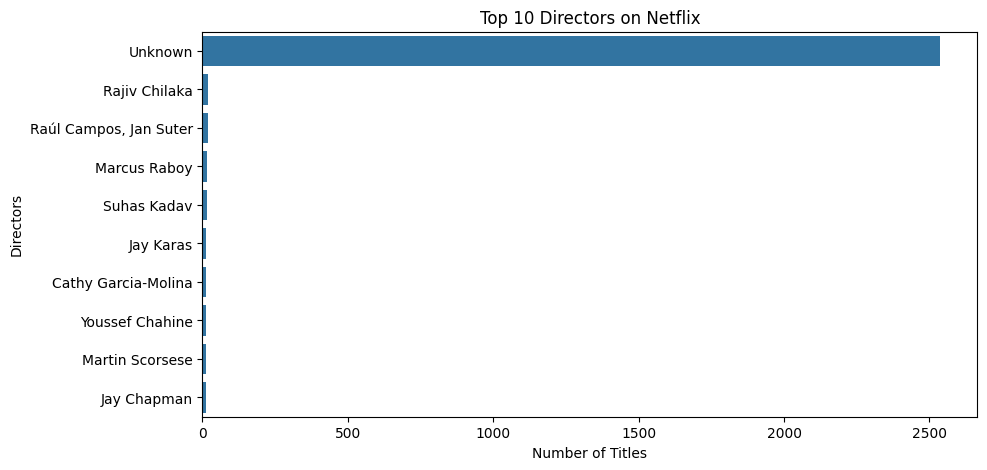

In [61]:
# Top 10 Directors ko visualize karen
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Directors")
plt.show()


In [59]:

#  To find Top 10 actors based on their appearances
top_actors = all_actors.value_counts().head(10)
print("Top 10 Actors on Netflix:\n", top_actors)

Top 10 Actors on Netflix:
 Unknown             817
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Rupa Bhimani         31
Takahiro Sakurai     31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Name: count, dtype: int64


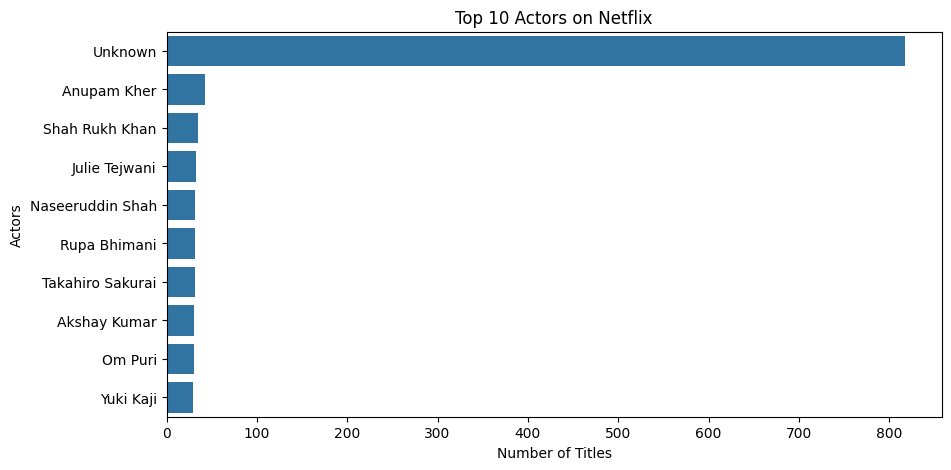

In [62]:
# Top 10 Actors ko visualize karen
plt.figure(figsize=(10, 5))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actors")
plt.show()

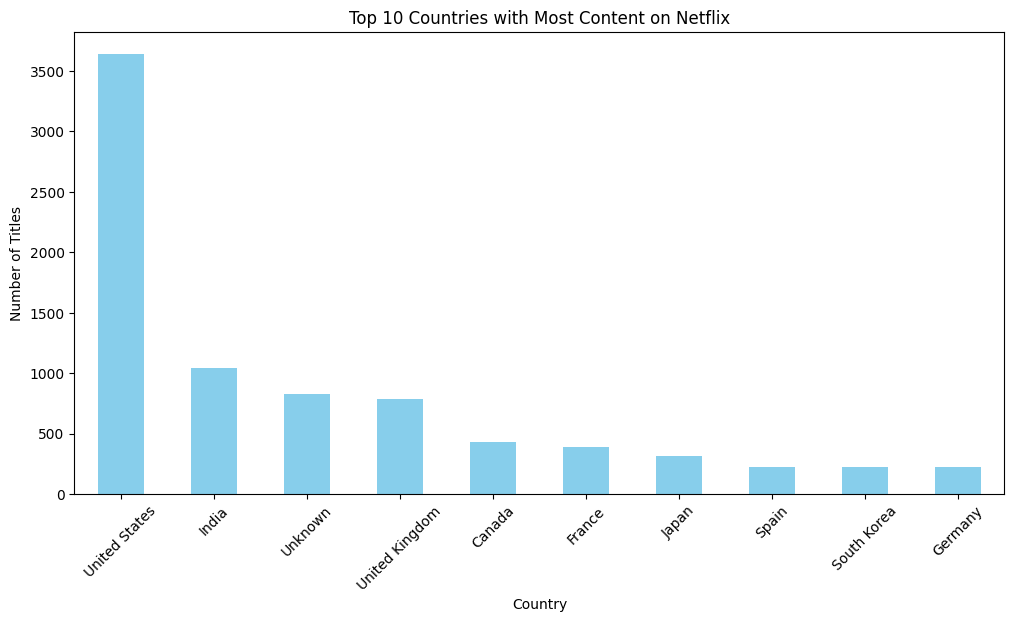

In [65]:
all_countries = data['country'].str.split(',', expand=True).stack().str.strip()

# Country-wise count of titles
country_counts = all_countries.value_counts()

# Top 10 countries ko select karein
top_10_countries = country_counts.head(10)

# Visualization of top 10 countries
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

In [82]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Sample dataset
data = {
    'itemId': ['Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5'],
    'genre': ['Action', 'Action', 'Comedy', 'Drama', 'Comedy'],
    'description': [
        "Action packed movie with thrilling sequences.",
        "Another action movie with great stunts.",
        "A fun and light-hearted comedy film.",
        "An emotional drama that touches the heart.",
        "A comedy that will make you laugh out loud."
    ]
}

# Create a DataFrame
data = pd.DataFrame(data)

# Create a TF-IDF Vectorizer for the descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

# Calculate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df.index[df['itemId'] == title][0]
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 5 most similar movies
    return df['itemId'].iloc[movie_indices]

# Example: Get recommendations for 'Movie1'
print("Content-Based Recommendations for 'Movie1':")
print(get_recommendations('Movie1'))



Content-Based Recommendations for 'Movie1':
1    Movie2
2    Movie3
3    Movie4
4    Movie5
Name: itemId, dtype: object


In [88]:
# Sample dataset with additional attributes
data = {
    'itemId': ['Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5'],
    'genre': ['Action', 'Action', 'Comedy', 'Drama', 'Comedy'],
    'description': [
        "Action packed movie with thrilling sequences.",
        "Another action movie with great stunts.",
        "A fun and light-hearted comedy film.",
        "An emotional drama that touches the heart.",
        "A comedy that will make you laugh out loud."
    ],
    'rating': [4.5, 4.0, 4.2, 4.8, 4.1]  # Example ratings
}

# Create a DataFrame
data= pd.DataFrame(data)


In [89]:
# Combine relevant features into a single string
data['combined_features'] = data['genre'] + ' ' + data['description']

# Create a TF-IDF Vectorizer for the combined features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])


In [90]:
# Calculate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [91]:
# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df.index[df['itemId'] == title][0]
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]  # Skip the first one as it is the movie itself
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 5 most similar movies
    return df['itemId'].iloc[movie_indices]


In [92]:
# Example: Get recommendations for 'Movie1'
print("Content-Based Recommendations for 'Movie1':")
print(get_recommendations('Movie1'))


Content-Based Recommendations for 'Movie1':
1    Movie2
2    Movie3
3    Movie4
4    Movie5
Name: itemId, dtype: object


In [ ]:
## Conclusion

In this project, I analyzed Netflix's movie and TV show dataset to uncover content trends and build a content-based recommendation system. The analysis highlighted the prevalence of action and comedy genres on the platform and revealed how content addition has evolved over the years.

The recommendation system demonstrated its effectiveness by suggesting similar movies based on descriptions, enhancing user experience.

### Future Work
- Implement collaborative filtering for improved recommendations.
- Explore user ratings to refine the recommendation algorithm.
- Analyze user engagement metrics for deeper insights.

Overall, this project provided valuable insights into Netflix's content landscape and showcased the potential of recommendation systems in personalizing user experiences.
